# ME314 Homework 4

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.

- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

Collaborators: Ben Benyamin, Grayson Snyder, Joe Blom, Aditya Nair, Sharwin Patil

In [57]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [58]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dynhoop2.png' width=528.4' height='500'></table>"))

## Problem 1 (20pts)

Take the bead on a hoop example shown in the image above, model it using a torque input $\tau$ (about the vertical $z$ axis) instead of a velocity input $\omega$. You will need to add a configuration variable $\psi$ that is the rotation about the $z$ axis, so that the system configuration vector is $q=[\theta,\psi]$. Use Python's SymPy package to compute the equations of motion for this system in terms of $\theta, \psi$.

*Hint 1: Note that this should be a Lagrangian system with an external force.*

**Turn in: A copy of code used to symbolically solve for the equations of motion, also include the code outputs, which should be the equations of motion.**

In [59]:
# Declaring useful symbols
t, R, m, g, phi, tau = sym.symbols(r't, R, m, g, \phi, \tau')
th = sym.Function(r'\theta')(t)
psi = sym.Function(r'\psi')(t)
q = sym.Matrix([th, psi])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Velocities of the bead
v1 = R*qdot[0]
v2 = R*sym.sin(q[0])*qdot[1]

# Kinetic energy of the bead
KE = 0.5*m*v1**2 + 0.5*m*v2**2

# Potential energy of the bead
PE = m*g*R*(1 - sym.cos(q[0]))

# Lagrangian of the system
L = KE - PE
display(L)

L_mat = sym.Matrix([L])
# first term of EL equation
dLdq = L_mat.jacobian(q)
# second term of EL equation
dLdqdot = L_mat.jacobian(qdot)
dLdqdotdot = dLdqdot.diff(t)

# E-L expression for the system
E_L = dLdq - dLdqdotdot

# modelling the external force in terms of tau
F_ext = sym.Matrix([0,tau])

# lambdifying the EL eqn
EL_eqn = sym.Eq(E_L.T, F_ext)

soln = sym.solve(EL_eqn, qddot, dict= True)
# printing the expressions for accelerations
for sol in soln:
  print("\n\033[1mAccelerations: ")
  for v in qddot:
    display(sym.Eq(v, sol[v]))


                                      2                           2                             
     2      2            ⎛d          ⎞         2   ⎛d            ⎞                              
0.5⋅R ⋅m⋅sin (\theta(t))⋅⎜──(\psi(t))⎟  + 0.5⋅R ⋅m⋅⎜──(\theta(t))⎟  - R⋅g⋅m⋅(1 - cos(\theta(t)))
                         ⎝dt         ⎠             ⎝dt           ⎠                              


Accelerations: 


 2                                                          2                   
d                                              ⎛d          ⎞    g⋅sin(\theta(t))
───(\theta(t)) = sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\psi(t))⎟  - ────────────────
  2                                            ⎝dt         ⎠           R        
dt                                                                              

                                    d           d                                   
 2               2.0⋅cos(\theta(t))⋅──(\psi(t))⋅──(\theta(t))                       
d                                   dt          dt                      \tau        
───(\psi(t)) = - ──────────────────────────────────────────── - ────────────────────
  2                             sin(\theta(t))                   2      2           
dt                                                              R ⋅m⋅sin (\theta(t))

## Problem 2 (30pts)

Consider a point mass in 3D space under the forces of gravity and a radial spring from the origin. The system's Lagrangian is:
$$
L=\frac{1}{2} m (\dot{x}^2+\dot{y}^2+\dot{z}^2)- \frac{1}{2} k (x^2+y^2+z^2)-mgz
$$
Consider the following rotation matrices, defining rotations about the $z$, $y$, and $x$ axes respectively:
$$
R_\theta =\begin{bmatrix}\cos \theta & -\sin \theta & 0 \\ \sin \theta &
    \cos \theta& 0 \\ 0 & 0 & 1\end{bmatrix},
    \ \
R_\psi = \begin{bmatrix}\cos \psi & 0 & \sin \psi \\ 0 & 1 & 0 \\
    -\sin \psi & 0 & \cos \psi \end{bmatrix}, \ \
R_\phi = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos \phi & -\sin \phi \\
    0 & \sin \phi & \cos \phi \end{bmatrix}
$$

and answer the following three questions:

1. Which, if any, of the transformations $q_{\theta}=R_{\theta}q$, $q_{\psi}=R_{\psi}q$, or $q_{\phi}=R_{\phi}q$ keeps the Lagrangian fixed (invariant)? Is this invariance global or local?

2. Use small angle approximations to linearize your transformation(s) from the first question. The resulting new transformation(s) should have the form $q_{\epsilon}=q+\epsilon G(q)$. Compute the difference in the Lagrangian $L(q_\epsilon, \dot{q}_\epsilon) - L(q,\dot{q})$ through this/these transformation(s).

3. Apply Noether's theorem to determine a conserved quantity. What does this quantity represent physically?  Is there any rationale behind its conservation?

You can solve this problem by hand or use Python's SymPy to do the symbolic computation for you.

*Hint 1: For question (1), try to imagine how this system looks. Even though the $x$, $y$, and $z$ axes seem to have the same influence on the system, rotation around some axes will influence the Lagrangian more than others will.*

*Hint 2: Global invariance here means for any magnitude of rotation the Lagrangian will remain fixed.*

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, then you just need to include a copy of code and the code outputs, with notes that explain why the code outputs can answer the questions.**

In [60]:
# Declaring useful symbols
t, m, k, g = sym.symbols('t, m, k, g')
th, psi, phi = sym.symbols(r'\theta, \psi, \phi')
x = sym.Function('x')(t)
y = sym.Function('y')(t)
z = sym.Function('z')(t)
q = sym.Matrix([x, y, z])
qdot = q.diff(t)

R_theta = sym.Matrix([[sym.cos(th), -sym.sin(th), 0],[sym.sin(th), sym.cos(th), 0],[0, 0, 1]])
R_psi = sym.Matrix([[sym.cos(psi), 0, sym.sin(psi)],[0, 1, 0],[-sym.sin(psi),0, sym.cos(psi)]])
R_phi = sym.Matrix([[1, 0, 0],[0, sym.cos(phi), -sym.sin(phi)],[0, sym.sin(phi), sym.cos(phi)]])

# Defining new q after multiplying by the rotation matrices
qth = R_theta * q
qthdot = qth.diff(t)
qpsi = R_psi * q
qpsidot = qpsi.diff(t)
qphi = R_phi * q
qphidot = qphi.diff(t)
# display(qth, qpsi, qphi)

# Defining the Lagrangian of the system in terms of q
L = 0.5*m*(qdot[0]**2 + qdot[1]**2 + qdot[2]**2) - 0.5*k*(q[0]**2 + q[1]**2 + q[2]**2) - m*g*q[2]
# Defining the Lagrangian of the system in terms of qth
L_th = sym.trigsimp(0.5*m*(qthdot[0]**2 + qthdot[1]**2 + qthdot[2]**2) - 0.5*k*(qth[0]**2 + qth[1]**2 + qth[2]**2) - m*g*qth[2])
print("\033[1mL in terms of qtheta: ")
display(L_th)

# Defining the Lagrangian of the system in terms of qpsi
L_psi = sym.trigsimp(0.5*m*(qpsidot[0]**2 + qpsidot[1]**2 + qpsidot[2]**2) - 0.5*k*(qpsi[0]**2 + qpsi[1]**2 + qpsi[2]**2) - m*g*qpsi[2])
print("\033[1mL in terms of qpsi: ")
display(L_psi)

# Defining the Lagrangian of the system in terms of qphi
L_phi = sym.trigsimp(0.5*m*(qphidot[0]**2 + qphidot[1]**2 + qphidot[2]**2) - 0.5*k*(qphi[0]**2 + qphi[1]**2 + qphi[2]**2) - m*g*qphi[2])
print("\033[1mL in terms of qphi: ")
display(L_phi)


L in terms of qtheta: 


                                                  ⎛          2             2             2⎞
                  ⎛ 2       2       2   ⎞         ⎜⎛d       ⎞    ⎛d       ⎞    ⎛d       ⎞ ⎟
-g⋅m⋅z(t) - 0.5⋅k⋅⎝x (t) + y (t) + z (t)⎠ + 0.5⋅m⋅⎜⎜──(x(t))⎟  + ⎜──(y(t))⎟  + ⎜──(z(t))⎟ ⎟
                                                  ⎝⎝dt      ⎠    ⎝dt      ⎠    ⎝dt      ⎠ ⎠

L in terms of qpsi: 


                                                                                ⎛          2       ↪
                                                ⎛ 2       2       2   ⎞         ⎜⎛d       ⎞    ⎛d  ↪
-g⋅m⋅(-x(t)⋅sin(\psi) + z(t)⋅cos(\psi)) - 0.5⋅k⋅⎝x (t) + y (t) + z (t)⎠ + 0.5⋅m⋅⎜⎜──(x(t))⎟  + ⎜── ↪
                                                                                ⎝⎝dt      ⎠    ⎝dt ↪

↪        2             2⎞
↪       ⎞    ⎛d       ⎞ ⎟
↪ (y(t))⎟  + ⎜──(z(t))⎟ ⎟
↪       ⎠    ⎝dt      ⎠ ⎠

L in terms of qphi: 


                                                                               ⎛          2        ↪
                                               ⎛ 2       2       2   ⎞         ⎜⎛d       ⎞    ⎛d   ↪
-g⋅m⋅(y(t)⋅sin(\phi) + z(t)⋅cos(\phi)) - 0.5⋅k⋅⎝x (t) + y (t) + z (t)⎠ + 0.5⋅m⋅⎜⎜──(x(t))⎟  + ⎜──( ↪
                                                                               ⎝⎝dt      ⎠    ⎝dt  ↪

↪       2             2⎞
↪      ⎞    ⎛d       ⎞ ⎟
↪ y(t))⎟  + ⎜──(z(t))⎟ ⎟
↪      ⎠    ⎝dt      ⎠ ⎠

The transformation around the $z$ axis ($q_\theta$ = $q$ *$R_\theta$) keeps the Lagrangian invariant. This invariance seems to be global since it is independent of $\theta$, and so even a large change in theta will not alter the Lagrangian.

In [61]:
def L_var(q):
  qdot = q.diff(t)

  # return (0.5*m*(qdot[0]**2 + qdot[1]**2 + qdot[2]**2) - 0.5*k*(q[0]**2 + q[1]**2 + q[2]**2) - m*g*q[2])
  return 0.5*m*(qdot[0]**2 + qdot[1]**2 + qdot[2]**2) -0.5*k*(q[0]**2 + q[1]**2 +q[2]**2) -m*g*q[2]

qtheps = q + th*(sym.Matrix([-y , x, 0]))
qpsieps = q + psi*(sym.Matrix([z, 0, -x]))
qphieps = q + phi*(sym.Matrix([0, -z, y]))

# display(qtheps, qpsieps, qphieps)

# Defining the Lagrangian in terms of qth
L_th_eps = L_var(qtheps)
# display(L_th_eps)
# Defining the Lagrangian in terms of qpsi
L_psi_eps = L_var(qpsieps)
# display(L_psi)
# Defining the Lagrangian in terms of qphi
L_phi_eps = L_var(qphieps)
# display(L_phi)

# Calculating the difference between the Lagrangians
change_th = L_th_eps - L
print("\033[1mChange in Lagrangian in terms of theta: ")
display(sym.simplify(change_th))
change_psi = L_psi_eps - L
print("\033[1mChange in Lagrangian in terms of psi: ")
display(sym.simplify(change_psi))
change_phi = L_phi_eps - L
print("\033[1mChange in Lagrangian in terms of phi: ")
display(sym.simplify(change_phi))



Change in Lagrangian in terms of theta: 


            ⎛                                  2               2⎞
          2 ⎜     2         2        ⎛d       ⎞      ⎛d       ⎞ ⎟
0.5⋅\theta ⋅⎜- k⋅x (t) - k⋅y (t) + m⋅⎜──(x(t))⎟  + m⋅⎜──(y(t))⎟ ⎟
            ⎝                        ⎝dt      ⎠      ⎝dt      ⎠ ⎠

Change in Lagrangian in terms of psi: 


     ⎛                                                             2                        2      ↪
     ⎜              2                  2                 ⎛d       ⎞               ⎛d       ⎞       ↪
\psi⋅⎜- 0.5⋅\psi⋅k⋅x (t) - 0.5⋅\psi⋅k⋅z (t) + 0.5⋅\psi⋅m⋅⎜──(x(t))⎟  + 0.5⋅\psi⋅m⋅⎜──(z(t))⎟  + 1. ↪
     ⎝                                                   ⎝dt      ⎠               ⎝dt      ⎠       ↪

↪           ⎞
↪           ⎟
↪ 0⋅g⋅m⋅x(t)⎟
↪           ⎠

Change in Lagrangian in terms of phi: 


     ⎛                                                             2                        2      ↪
     ⎜              2                  2                 ⎛d       ⎞               ⎛d       ⎞       ↪
\phi⋅⎜- 0.5⋅\phi⋅k⋅y (t) - 0.5⋅\phi⋅k⋅z (t) + 0.5⋅\phi⋅m⋅⎜──(y(t))⎟  + 0.5⋅\phi⋅m⋅⎜──(z(t))⎟  - 1. ↪
     ⎝                                                   ⎝dt      ⎠               ⎝dt      ⎠       ↪

↪           ⎞
↪           ⎟
↪ 0⋅g⋅m⋅y(t)⎟
↪           ⎠

In [62]:
# From Noether's theorem, p = dL/dqdot*G(q)
# Gq for the first transformation
Gq = sym.Matrix([-y, x, 0])

q = sym.Matrix([x, y, z])
qdot = q.diff(t)

# Defining the Lagrangian expression
L = sym.Matrix([0.5*m*(qdot[0]**2 + qdot[1]**2 + qdot[2]**2) - 0.5*k*(q[0]**2 + q[1]**2 + q[2]**2) - m*g*q[2]])
# Calculating dL/dq
dLdqdot = L.jacobian(qdot)


# Acc to Noether's theorem, the conserved quantity p is given by
p = dLdqdot*Gq
display(p)


⎡           d                     d       ⎤
⎢1.0⋅m⋅x(t)⋅──(y(t)) - 1.0⋅m⋅y(t)⋅──(x(t))⎥
⎣           dt                    dt      ⎦

The conserved quantity in this case is angular momentum. The first transformation is rotation about the z-axis, and as depicted by the results above, the Lagrangian remains unchanged. So the angular momentum in the x and y directions is conserved (as shown by the expression for the conserved quantity p).

In [63]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/atulletaylor/ME314Figures/raw/main/hw4problem3.png' width='600' height='350'></td></tr></table>"))

""


## Problem 3 (20pts)

For the inverted cart-pendulum system in Homework 1 (feel free to make use of the provided solutions), compute the conserved momentum using N&ouml;ther's theorem.  Plot the momentum for the same simulation parameters and initial conditions.  Taking into account the conserved quantities, what is the minimal number of *states* in the cart/pendulum system that can vary?  (Hint: In some coordinate systems it may *look* like all the states are varying, but if you choose your coordinates cleverly fewer states will vary.)

**Turn in: A copy of code used to calculate the conserved quantity and your answer to the question. You don't need to turn in equations of motion, but you need to include the plot of the conserved quantity evaluated along the system trajectory.**

In [64]:
# define constants (as symbols)
t, m, M, R, g = sym.symbols(r't, m, M, R, g')
# define states and time derivatives
x = sym.Function(r'x')(t)
th = sym.Function(r'\theta')(t)
q = sym.Matrix([x, th])
xdot = x.diff(t)
thdot= th.diff(t)
qdot = q.diff(t)
xddot = xdot.diff(t)
thddot = thdot.diff(t)
qddot = qdot.diff(t)
# compute pendulum's velocity in x and y direction
# this is under the "world frame", from where we measure
# the position of the cart as x(t)
pen_xdot = xdot + R*thdot*sym.cos(th)
pen_ydot = R*thdot*sym.sin(th)
# compute Lagrangian
ke = 0.5*M*xdot**2 + 0.5*m*(pen_xdot**2 + pen_ydot**2)
pe = m*g*R*sym.cos(th)
L = ke - pe
print('Lagrangian: ')
display(sym.simplify(L))


# For the given system, G(q) is given by [1, 0]
Gq = sym.Matrix([1, 0])
# By Noether's theorem, p = dL/dqdot*Gq
L_mat = sym.Matrix([L])
dLdqdot = L_mat.jacobian(qdot)
p = dLdqdot*Gq
print("\033[1mConserved quantity p: ")
display(p)


# storing the Lagrangian expression in a matrix for further computations

J_mat = sym.Matrix([L])

# calculating first term of E-L equation

dJdq = J_mat.jacobian(q)

# computing derivative for intermediate second term
dJdq_dot = J_mat.jacobian(qdot)

# differentiating dJdq_dot wrt t

dJdq_dot_dot = dJdq_dot.diff(t)

# Writing the expression for Euler-Lagrange equations
print("\n\033[1mExpression for Euler-Lagrange equation: ")
EL_expr = dJdq - dJdq_dot_dot
display(EL_expr.T)

# defining the rhs of the equation
rhs = sym.Matrix([0, 0])
# defining the equations
EL_eqn = sym.Eq(EL_expr.T, rhs)

soln = sym.solve(EL_eqn, qddot, dict=True)
# printing the accelerations
# for sol in soln:
#   print('\n\033[1mAccelerations: ')
#   for v in qddot:
#     display(sym.simplify(sym.Eq(v, sol[v])))
# lambdifying the expressions wrt the given variables
x_val = sym.lambdify([x, M, m, th, thdot, R, g], soln[0][xddot])
theta_val = sym.lambdify([M, m, th, thdot, R, g], soln[0][thddot])

Lagrangian: 


                2                                ⎛                  2                              ↪
      ⎛d       ⎞                                 ⎜ 2 ⎛d            ⎞                       d       ↪
0.5⋅M⋅⎜──(x(t))⎟  - R⋅g⋅m⋅cos(\theta(t)) + 0.5⋅m⋅⎜R ⋅⎜──(\theta(t))⎟  + 2⋅R⋅cos(\theta(t))⋅──(\the ↪
      ⎝dt      ⎠                                 ⎝   ⎝dt           ⎠                       dt      ↪

↪                             2⎞
↪        d          ⎛d       ⎞ ⎟
↪ ta(t))⋅──(x(t)) + ⎜──(x(t))⎟ ⎟
↪        dt         ⎝dt      ⎠ ⎠

Conserved quantity p: 


⎡      d                ⎛                   d                 d       ⎞⎤
⎢1.0⋅M⋅──(x(t)) + 0.5⋅m⋅⎜2⋅R⋅cos(\theta(t))⋅──(\theta(t)) + 2⋅──(x(t))⎟⎥
⎣      dt               ⎝                   dt                dt      ⎠⎦


Expression for Euler-Lagrange equation: 


⎡                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                             ⎛                                                  2                 ↪
⎢                             ⎜   2                               ⎛d            ⎞        ⎛         ↪
⎢R⋅g⋅m⋅sin(\theta(t)) + 0.5⋅m⋅⎜2⋅R ⋅sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\theta(t))⎟  - 2⋅R⋅⎜R⋅cos(\t ↪
⎢                             ⎝                                   ⎝dt           ⎠        ⎝ 

Shape of traj:  (4, 100)


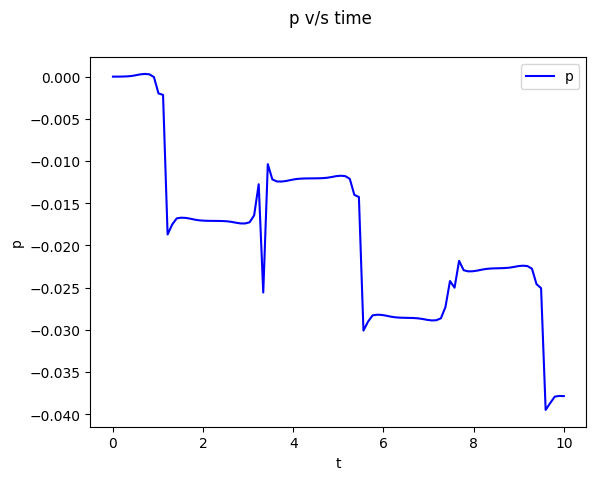

In [65]:
def integrate(f, xt, dt):
  """
  This function takes in an initial condition x(t) and a timestep dt,
  as well as a dynamical system f(x) that outputs a vector of the
  same dimension as x(t). It outputs a vector x(t+dt) at the future
  time step.
  Parameters
  ============
  dyn: Python function
  derivate of the system at a given step x(t),
  it can considered as \dot{x}(t) = func(x(t))
  xt: NumPy array
  current step x(t)
  dt:
  step size for integration
  Return
  ============
  new_xt:
  value of x(t+dt) integrated from x(t)
  """
  k1 = dt * f(xt)
  k2 = dt * f(xt+k1/2.)
  k3 = dt * f(xt+k2/2.)
  k4 = dt * f(xt+k3)
  new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
  return new_xt
def simulate(f, x0, tspan, dt, integrate):
  """
  This function takes in an initial condition x0, a timestep dt,
  a time span tspan consisting of a list [min_time, max_time],
  as well as a dynamical system f(x) that outputs a vector of the
  same dimension as x0. It outputs a full trajectory simulated
  over the time span of dimensions (xvec_size, time_vec_size).
  Parameters
  ============
  f: Python function
  derivate of the system at a given step x(t),
  it can considered as \dot{x}(t) = func(x(t))
  x0: NumPy array
  initial conditions
  tspan: Python list
  tspan = [min_time, max_time], it defines the start and end
  time of simulation
  dt:
  time step for numerical integration
  integrate: Python function
  numerical integration method used in this simulation
  Return
  ============
  x_traj:
  simulated trajectory of x(t) from t=0 to tf
  """
  N = int((max(tspan)-min(tspan))/dt)
  x = np.copy(x0)
  tvec = np.linspace(min(tspan),max(tspan),N)
  xtraj = np.zeros((len(x0),N))
  for i in range(N):
    xtraj[:,i]=integrate(f,x,dt)
    x = np.copy(xtraj[:,i])
  return xtraj

# defining a function to get values of xddot and thetaddot
def ddot(q):
  xddot_val = x_val(q[0], 2, 1, q[1], q[3], 1, 9.8)
  thetaddot_val = theta_val(2, 1, q[1], q[3], 1, 9.8)
  return xddot_val, thetaddot_val
# function to calculate the derivative of the system state vector
def dyn(q):
  """
  System dynamics function (extended)
  Parameters
  ============
  s: NumPy array
  s = [x, theta, xdot, thetadot] is the extended system
  state vector, includng the position and
  the velocity of the particle
  Return
  ============
  sdot: NumPy array
  time derivative of input state vector,
  sdot = [xdot, thetadot, xddot, thetaddot]
  """
  return np.array([q[2], q[3], ddot(q)[0], ddot(q)[1]])


# time derivative of input state vector
f = np.array([xdot, thdot, x_val, theta_val])
# initial conditions of the system
s0 = np.array([0, 0.1, 0, 0])
# calling the simulate function to calculate the trajectory
traj = simulate(dyn, s0, [0,10], 0.1, integrate)
print('\033[1mShape of traj: \033[0m', traj.shape)

p_val = []
def compute_p(i):
  p_val.append(p[0].subs({th: traj[1, i], xdot: traj[2,i], thdot: traj[3, i], R: 1, m: 1, M: 2}))

for i in range(0,100):
  compute_p(i)


timespan = np.linspace(0,10,100)
# plotting the trajectory of p
fig, ax1 = plt.subplots(1, 1)
fig.suptitle('p v/s time')
ax1.plot(timespan, p_val, 'blue', label= 'p')
ax1.set_ylabel('p')
ax1.set_xlabel('t')
plt.legend()
plt.show()

The minimum number of states in the system that can vary is 1 since the conserved quantity depends on $\theta$ but is independent of $x$

In [66]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/atulletaylor/ME314Figures/raw/main/hw4p4.png' width='600' height='350'></td></tr></table>"))

""


## Problem 4 (30 pts)
Using the same inverted cart pendulum system, add a constraint such that the pendulum follows the path of a parabola with a vertex of $(1,0)$.

Then, simulate the system using $x$ and $\theta$ as the configuration variables for $t\in[0,15]$ with $dt=0.01$. The constants are $M=2, m=1, R=1, g=9.8$. Use the initial conditions $x=0, \theta=0, \dot{x}=0, \dot{\theta}=0.01$ for your simulation.

You should use the Runge–Kutta integration function provided in previous homework for simulation. Plot the simulated trajectory for $x, \theta$ versus time. We have a provided an animation function for testing.

*Hint 1: You will need the time derivatives of $\phi$ to solve the system of equations.*

*Hint 2: Make sure to be solving for $\lambda$ at the same time as your equations of motion.*

*Hint 3: Note that if you make your initial condition velocities faster or dt lower resolution, you may not be able to simulate the system because this is challenging constraint.*

**Turn in: A copy of code used to simulate the system, you don't need to turn in equations of motion, but you need to include the plot of the simulated trajectories.**

In [67]:
# define constants (as symbols)
t, m, M, R, g, lamb = sym.symbols(r't, m, M, R, g, \lambda')
# define states and time derivatives
x = sym.Function(r'x')(t)
th = sym.Function(r'\theta')(t)
q = sym.Matrix([x, th])
xdot = x.diff(t)
thdot= th.diff(t)
qdot = q.diff(t)
xddot = xdot.diff(t)
thddot = thdot.diff(t)
qddot = qdot.diff(t)
# compute pendulum's velocity in x and y direction
# this is under the "world frame", from where we measure
# the position of the cart as x(t)
pen_xdot = xdot + R*thdot*sym.cos(th)
pen_ydot = R*thdot*sym.sin(th)
# compute Lagrangian
ke = 0.5*M*xdot**2 + 0.5*m*(pen_xdot**2 + pen_ydot**2)
pe = m*g*R*sym.cos(th)
L = ke - pe
print('\033[1mLagrangian: ')
display(sym.simplify(L))

# Now defining the constraint for the system
phi = sym.Matrix([sym.sin(th)**2 - R*sym.sin(th) - x])
dphidq = phi.jacobian(q)

# Solving the Euler Lagrange equations
# storing the Lagrangian expression in a matrix for further computations
J_mat = sym.Matrix([L])
# calculating first term of E-L equation
dJdq = J_mat.jacobian(q)
# computing derivative for intermediate second term
dJdq_dot = J_mat.jacobian(qdot)
# differentiating dJdq_dot wrt t
dJdq_dot_dot = dJdq_dot.diff(t)

# Writing the expression for Euler-Lagrange equations

EL_expr = dJdq - dJdq_dot_dot

# Defining rhs for the EL equation
rhs = sym.Matrix([lamb*dphidq.T])
print("\n\033[1mExpression for Euler-Lagrange equation: ")
EL_eqn = sym.Eq(EL_expr.T, rhs)
display(EL_eqn)
# Writing the phiddot as equation
phidot = phi.diff(t)
phiddot = phidot.diff(t)
phiddot_eq = sym.Eq(sym.Matrix([phiddot]), sym.Matrix([0]))
display(phiddot_eq)

# Solving the equations for xddot, thddot and lambda
vars = sym.Matrix([xddot,thddot, lamb])
solution = sym.solve([EL_eqn,phiddot_eq], xddot,thddot,lamb)
print("\n\033[1mSolutions: ")
for v in vars:
  display(sym.simplify(sym.Eq(v, solution[v])))

# Lambdifying the expressions for ease of calculation
x_val = sym.lambdify([m, M, R, g, x, th, xdot, thdot], solution[xddot])
th_val = sym.lambdify([m, M, R, g, x, th, xdot, thdot], solution[thddot])


Lagrangian: 


                2                                ⎛                  2                              ↪
      ⎛d       ⎞                                 ⎜ 2 ⎛d            ⎞                       d       ↪
0.5⋅M⋅⎜──(x(t))⎟  - R⋅g⋅m⋅cos(\theta(t)) + 0.5⋅m⋅⎜R ⋅⎜──(\theta(t))⎟  + 2⋅R⋅cos(\theta(t))⋅──(\the ↪
      ⎝dt      ⎠                                 ⎝   ⎝dt           ⎠                       dt      ↪

↪                             2⎞
↪        d          ⎛d       ⎞ ⎟
↪ ta(t))⋅──(x(t)) + ⎜──(x(t))⎟ ⎟
↪        dt         ⎝dt      ⎠ ⎠


Expression for Euler-Lagrange equation: 


⎡                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                             ⎛                                                  2                 ↪
⎢                             ⎜   2                               ⎛d            ⎞        ⎛         ↪
⎢R⋅g⋅m⋅sin(\theta(t)) + 0.5⋅m⋅⎜2⋅R ⋅sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\theta(t))⎟  - 2⋅R⋅⎜R⋅cos(\t ↪
⎢                             ⎝                                   ⎝dt           ⎠        ⎝ 

⎡                                2                     2                                           ↪
⎢                 ⎛d            ⎞                     d                     2            ⎛d        ↪
⎢R⋅sin(\theta(t))⋅⎜──(\theta(t))⎟  - R⋅cos(\theta(t))⋅───(\theta(t)) - 2⋅sin (\theta(t))⋅⎜──(\thet ↪
⎢                 ⎝dt           ⎠                       2                                ⎝dt       ↪
⎣                                                     dt                                           ↪

↪       2                                    2                                                2    ↪
↪      ⎞                                    d                     2            ⎛d            ⎞     ↪
↪ a(t))⎟  + 2⋅sin(\theta(t))⋅cos(\theta(t))⋅───(\theta(t)) + 2⋅cos (\theta(t))⋅⎜──(\theta(t))⎟  -  ↪
↪      ⎠                                      2                                ⎝dt           ⎠     ↪
↪                                           dt                                            


Solutions: 


                ⎛                                  2                                     2         ↪
                ⎜ 2    2            ⎛d            ⎞     2    2            ⎛d            ⎞          ↪
 2          R⋅m⋅⎜R ⋅sin (\theta(t))⋅⎜──(\theta(t))⎟  + R ⋅cos (\theta(t))⋅⎜──(\theta(t))⎟  - R⋅g⋅c ↪
d               ⎝                   ⎝dt           ⎠                       ⎝dt           ⎠          ↪
───(x(t)) = ────────────────────────────────────────────────────────────────────────────────────── ↪
  2                                                 2    2                                         ↪
dt                                               M⋅R ⋅cos (\theta(t)) - 4.0⋅M⋅R⋅sin(\theta(t))⋅cos ↪

↪                                                      2                                           ↪
↪                          3            ⎛d            ⎞                                    4       ↪
↪ os(\theta(t)) - 2.0⋅R⋅sin (\theta(t))⋅⎜──(\theta(t))⎟  + 1.0⋅g⋅sin(2⋅\theta(t)) + 4.0⋅co

                                                          2                                        ↪
                        2                  ⎛d            ⎞                           ⎛d            ↪
 2               0.5⋅M⋅R ⋅sin(2⋅\theta(t))⋅⎜──(\theta(t))⎟  + 0.5⋅M⋅R⋅cos(\theta(t))⋅⎜──(\theta(t) ↪
d                                          ⎝dt           ⎠                           ⎝dt           ↪
───(\theta(t)) = ───────────────────────────────────────────────────────────────────────────────── ↪
  2                                                                                      2    2    ↪
dt                                                                                    M⋅R ⋅cos (\t ↪

↪   2                                           2                                         2        ↪
↪  ⎞                             ⎛d            ⎞                           ⎛d            ⎞         ↪
↪ )⎟  + 1.5⋅M⋅R⋅cos(3⋅\theta(t))⋅⎜──(\theta(t))⎟  - 1.0⋅M⋅sin(4⋅\theta(t))⋅⎜──(\theta(t))⎟

              ⎛                                       2                                            ↪
              ⎜       2                ⎛d            ⎞                                             ↪
          R⋅m⋅⎜1.0⋅M⋅R ⋅sin(\theta(t))⋅⎜──(\theta(t))⎟  - 0.5⋅M⋅R⋅g⋅sin(2⋅\theta(t)) + 2.0⋅M⋅R⋅cos ↪
              ⎝                        ⎝dt           ⎠                                             ↪
\lambda = ──────────────────────────────────────────────────────────────────────────────────────── ↪
                                                                             2    2                ↪
                                                                          M⋅R ⋅cos (\theta(t)) - 4 ↪

↪                              2                                                                   ↪
↪               ⎛d            ⎞                                                                    ↪
↪ (2⋅\theta(t))⋅⎜──(\theta(t))⎟  + 0.5⋅M⋅g⋅cos(\theta(t)) - 0.5⋅M⋅g⋅cos(3⋅\theta(t)) - 0.5

Shape of trajectory:  (4, 1500)


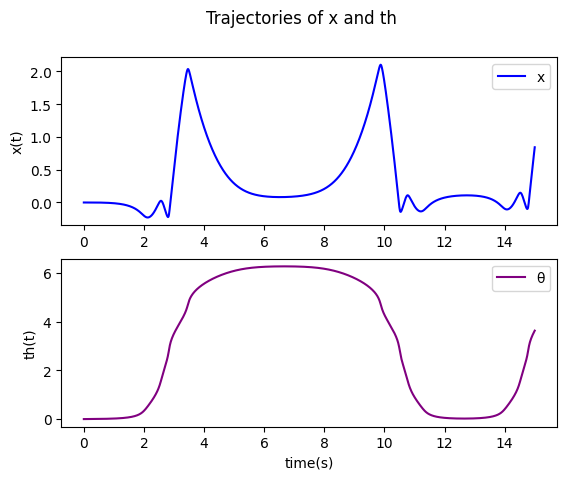

In [68]:
def sysddot(q):
  """
  Returns the ddot value of the system variables at given dot values
  """
  # x_val = solution[xddot].subs({g:9.8, x:q[0], xdot:q[2], th: q[1], thdot: q[3], M: 2, m: 1, R: 1} )
  xddot_val = x_val(1, 2, 1, 9.8, q[0], q[1], q[2], q[3])
  # th_val = solution[thddot].subs({g:9.8, x: q[0], xdot:q[2], th: q[1], thdot: q[3], M: 2, m:1, R:1})\
  thddot_val = th_val(1, 2, 1, 9.8, q[0], q[1], q[2], q[3])
  return xddot_val, thddot_val
def dyn(q):
  """
  Return the derivative of the system state vector
  Parameter:
  f = [x, th, xdot, thdot]
  Returns:
  fdot = [xdot, thdot, xddot, thddot]
  """
  return np.array([q[2],q[3], sysddot(q)[0],sysddot(q)[1]])


# Defining initial state of the system
s0 = np.array([0, 0, 0, 0.01])
traj = simulate(dyn, s0, [0,15], 0.01, integrate)
print("\033[1mShape of trajectory: \033[0m", traj.shape)

timespan = np.linspace(0,15,1500)
fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle("Trajectories of x and th")
ax1.plot(timespan, traj[0,:], 'blue', label='x')
ax1.legend()
ax1.set_ylabel('x(t)')
ax2.plot(timespan, traj[1,:], 'purple', label='θ')
ax2.set_ylabel('th(t)')
ax2.set_xlabel('time(s)')
ax2.legend()
plt.show()


In [69]:
def animate_cart_pend(traj_array,R=1,T=15):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    traj_array:
        trajectory of theta and x, should be a NumPy array with
        shape of (2,N)
    R:
        length of the pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xcart=traj_array[0]
    ycart = 0.0*np.ones(traj_array[0].shape)
    N = len(traj_array[1])

    xx1=xcart+R*np.sin(traj_array[1])
    yy1=R*np.cos(traj_array[1])

     # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=-4
    xM= 4
    ym=-4
    yM= 4

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[
          dict(x=xcart, y=ycart,
               mode='markers', name='Cart Traj',
               marker=dict(color="green", size=2)
              ),
          dict(x=xx1, y=yy1,
               mode='lines', name='Arm',
               line=dict(width=2, color='blue')
              ),
           dict(x=xx1, y=yy1,
               mode='lines', name='Pendulum',
               line=dict(width=2, color='purple')
              ),

           dict(x=xx1, y=yy1,
               mode='markers', name='Pendulum Traj',
               marker=dict(color="purple", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Cart Pendulum Simulation',
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[go.Scatter(
                            x=[xcart[k]],
                            y=[ycart[k]],
                            mode="markers",
                            marker_symbol="square",
                            marker=dict(color="blue", size=30)),

                       dict(x=[xx1[k],xcart[k]],
                            y=[yy1[k],ycart[k]],
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),

                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)
    iplot(figure1)

traj_arr = np.array([traj[0,:], traj[1,:]])
# animate_cart_pend(traj_array=traj_arr)